# <center> PREDICTING CRUDE OIL PRICE

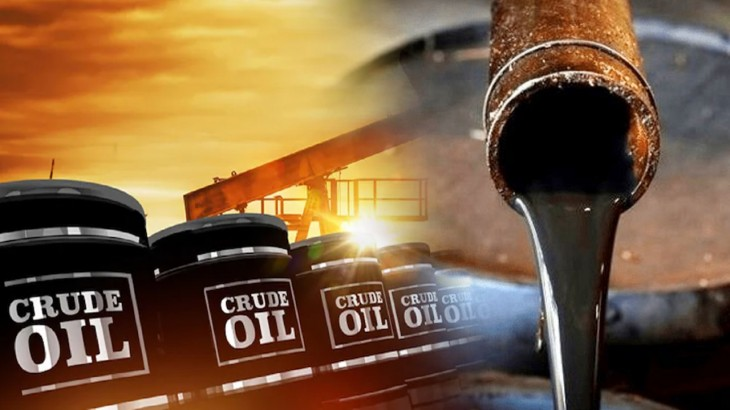

# Importing necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,RobustScaler,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
import pickle

In [2]:
df=pd.read_csv("crude-oil-price.csv")

# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           481 non-null    object 
 1   price          481 non-null    float64
 2   percentChange  480 non-null    float64
 3   change         480 non-null    float64
dtypes: float64(3), object(1)
memory usage: 15.2+ KB


In [4]:
df.head(11)

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.27,NaN,NaN
1,1983-04-04T00:00:00,30.63,4.646396,1.36
2,1983-05-02T00:00:00,30.25,-1.240614,-0.38
3,1983-06-01T00:00:00,31.38,3.735537,1.13
4,1983-07-01T00:00:00,32.00,1.975781,0.62
5,1983-08-01T00:00:00,31.59,-1.281250,-0.41
6,1983-09-01T00:00:00,30.36,-3.893637,-1.23
7,1983-10-03T00:00:00,30.37,0.032938,0.01
8,1983-11-01T00:00:00,29.23,-3.753704,-1.14
9,1983-12-01T00:00:00,29.60,1.265823,0.37


In [5]:
df

,date,price,percentChange,change
0,1983-03-30T00:00:00,29.2700,NaN,NaN
1,1983-04-04T00:00:00,30.6300,4.646396,1.3600
2,1983-05-02T00:00:00,30.2500,-1.240614,-0.3800
3,1983-06-01T00:00:00,31.3800,3.735537,1.1300
4,1983-07-01T00:00:00,32.0000,1.975781,0.6200
...,...,...,...,...
476,2022-11-01T00:00:00,80.6600,-5.550351,-4.7400
477,2022-12-01T00:00:00,80.4500,-0.260352,-0.2100
478,2023-01-03T00:00:00,79.1700,-1.591050,-1.2800
479,2023-02-01T00:00:00,77.0500,-2.677782,-2.1200


In [6]:
df.shape

(481, 4)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,481.0,45.155465,28.873291,10.420000,20.30000,31.570000,66.150000,140.000000
percentChange,480.0,0.750762,10.585128,-54.244861,-5.15252,0.924321,6.389538,88.375796
change,480.0,0.101581,4.949545,-32.830000,-1.68500,0.260000,2.317500,16.650000


In [8]:
df.tail()

,date,price,percentChange,change
476,2022-11-01T00:00:00,80.6600,-5.550351,-4.7400
477,2022-12-01T00:00:00,80.4500,-0.260352,-0.2100
478,2023-01-03T00:00:00,79.1700,-1.591050,-1.2800
479,2023-02-01T00:00:00,77.0500,-2.677782,-2.1200
480,2023-03-01T00:00:00,78.0288,1.270344,0.9788


In [9]:
df.isnull().mean()*100

date             0.0000
price            0.0000
percentChange    0.2079
change           0.2079
dtype: float64

# Filling the null values

In [10]:
df.percentChange.fillna(df.percentChange.mean(),inplace=True)

In [11]:
df.change.fillna(df.change.mean(),inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.drop(columns="date",inplace=True)

# Univariate analysis

# Histogram

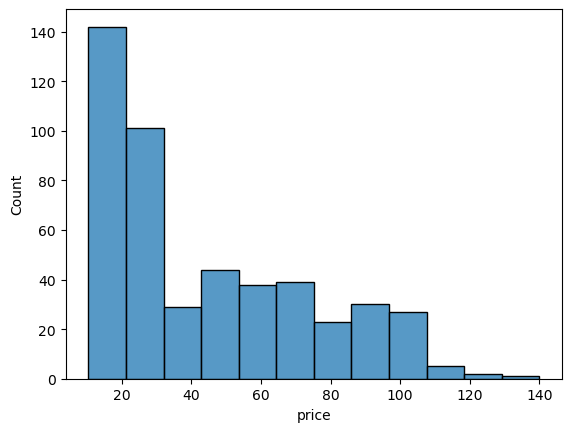

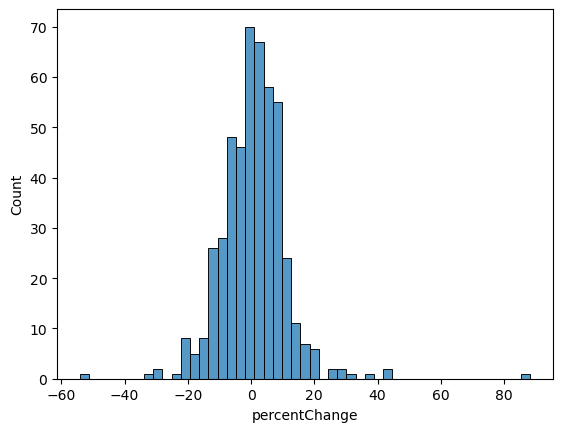

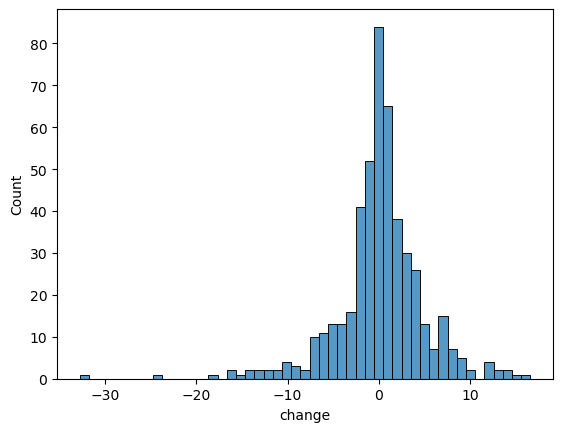

In [14]:
for i in df.columns:
    if df [i].dtypes!="object":
        sns.histplot(x=df[i])
        plt.show()

# Kde plot

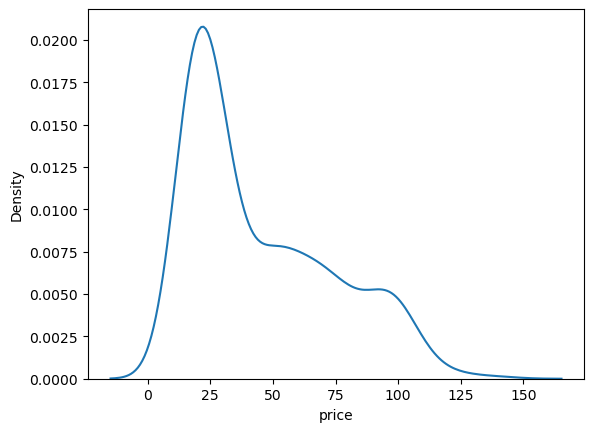

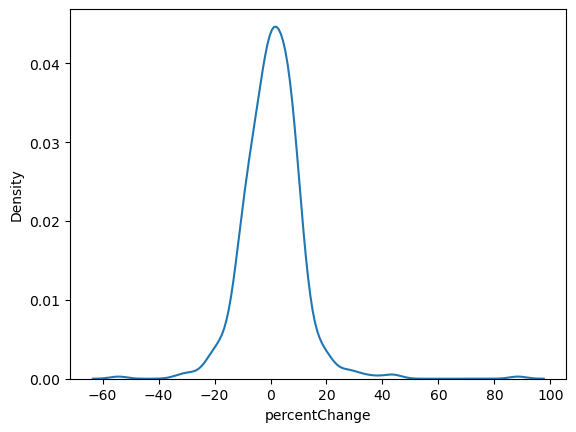

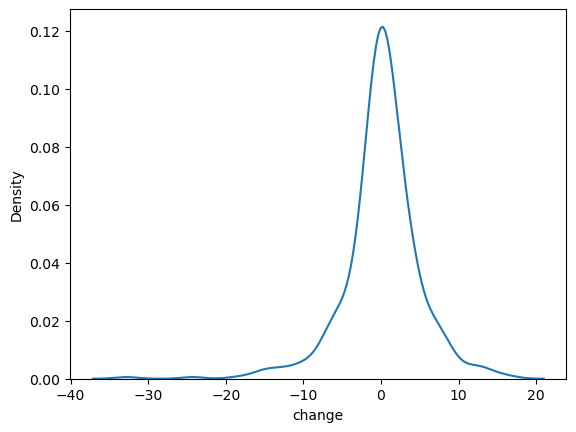

In [15]:
for i in df.columns:
    if df[i].dtypes!="object":
        sns.kdeplot(x=df[i])
        plt.show()

# Boxplot

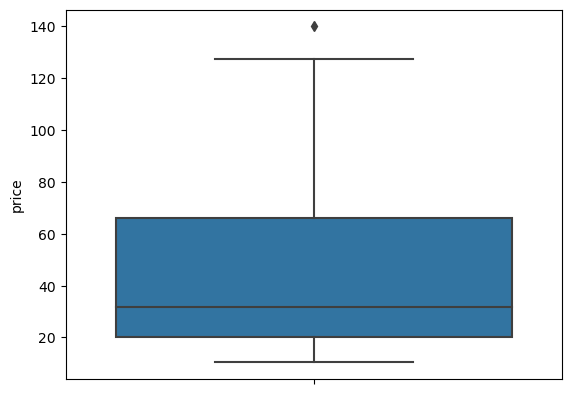

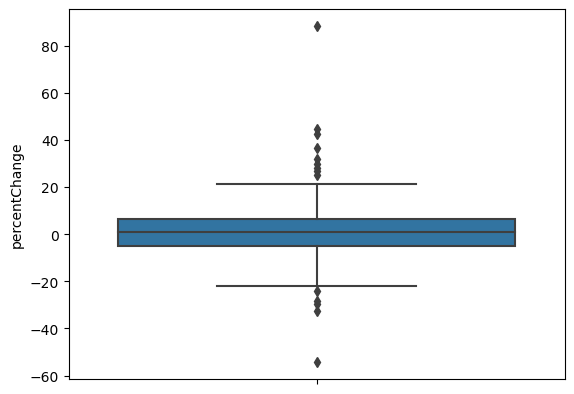

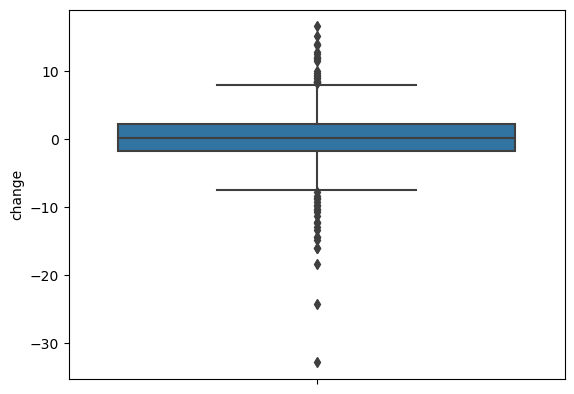

In [16]:
for i in df.columns:
    if df [i].dtypes!="object":
        sns.boxplot(y=df[i])
        plt.show();

# Violinplot

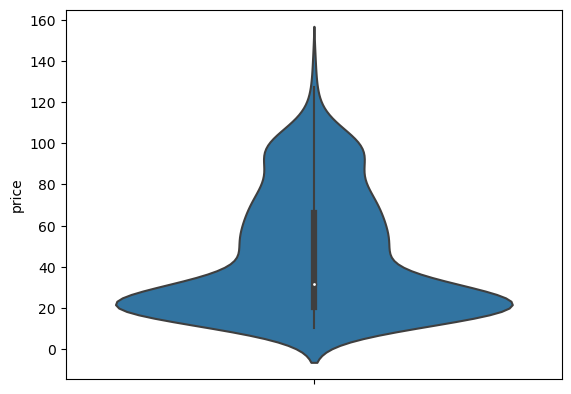

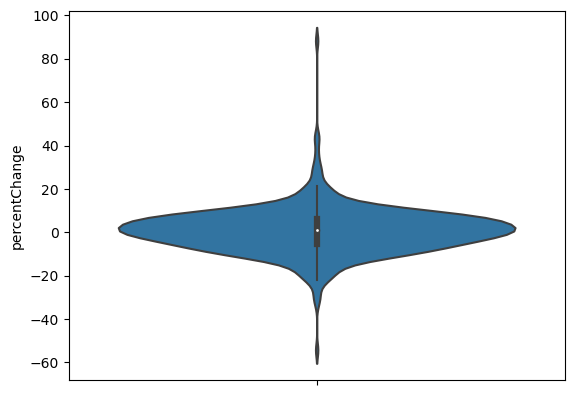

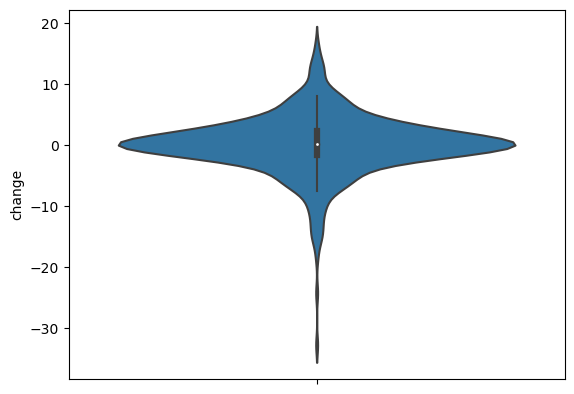

In [17]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.violinplot(y=df[i],price='blue')
        plt.show()

# Multi variate analysis

# Line plot

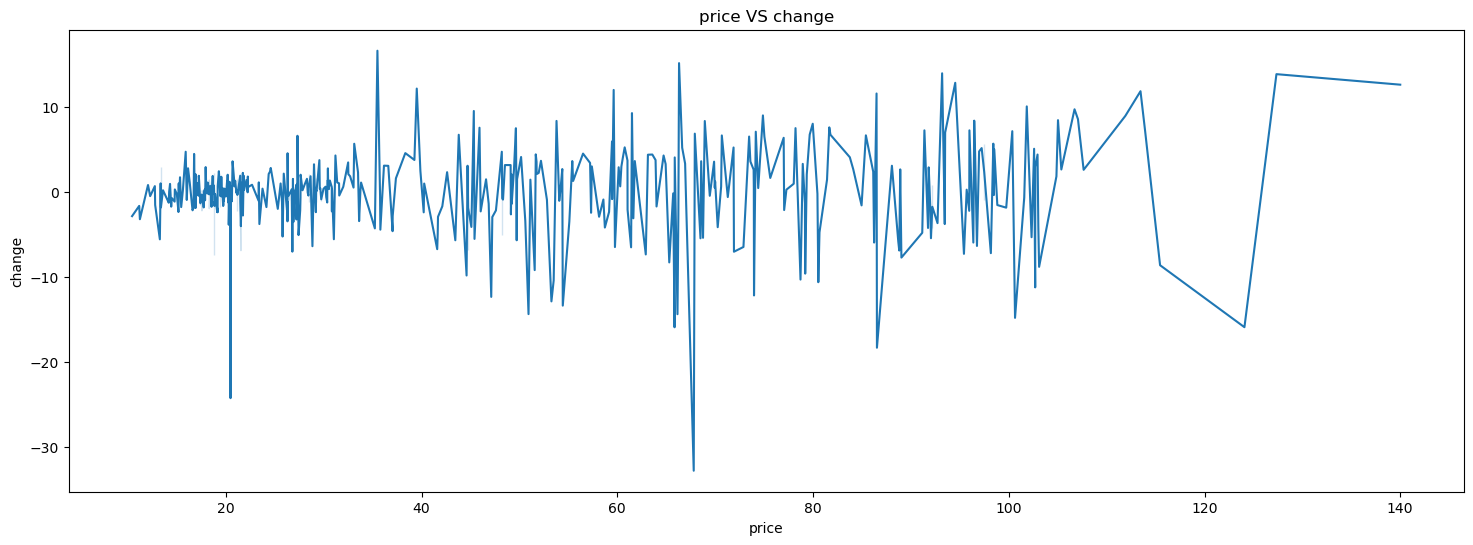

In [18]:
plt.figure(figsize=(18,6))
sns.lineplot('price','change',data=df)
plt.title('price VS change')
plt.show()

# Pair plot

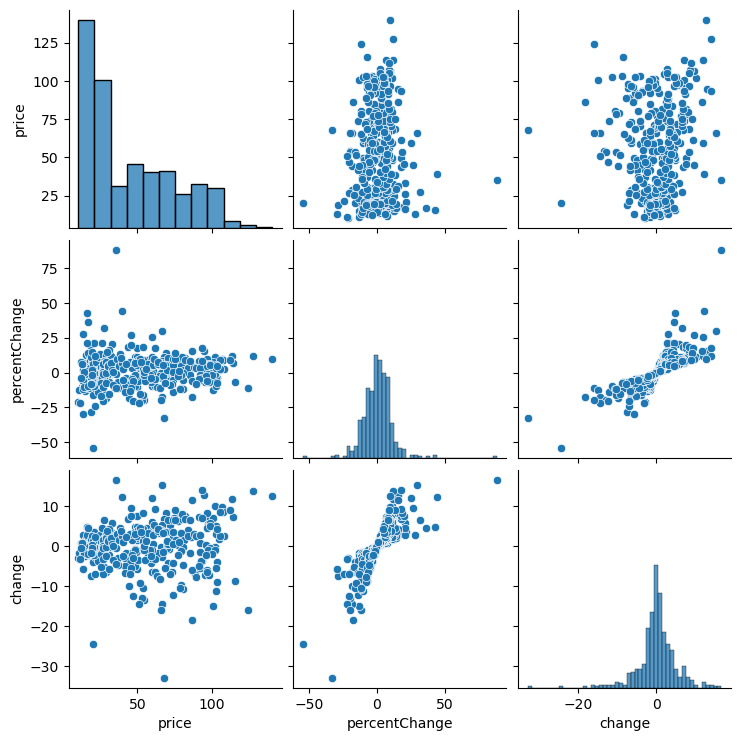

In [19]:
sns.pairplot(data=df)
plt.show()

# Treating outliers

In [20]:
def outlier_limit(col):
    Q3, Q1 = np.nanpercentile (col, [75,25])
    IQR = Q3 - Q1
    UL = Q3+1.5*IQR
    LL = Q1-1.5*Q1
    return UL, LL
for column in df.columns:
    if df[column].dtype != "object":
        UL, LL = outlier_limit(df[column])
        df[column] = np.where((df[column]>UL) | (df[column]<LL),np.nan,df[column])

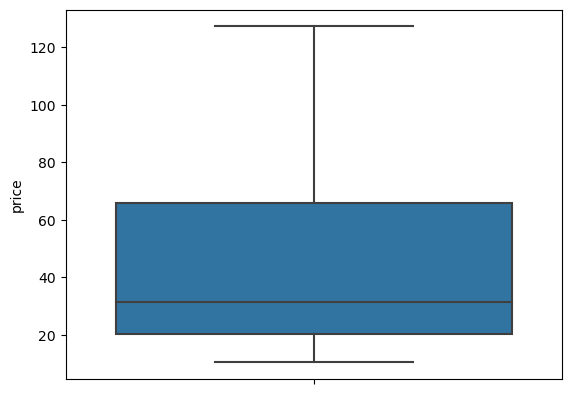

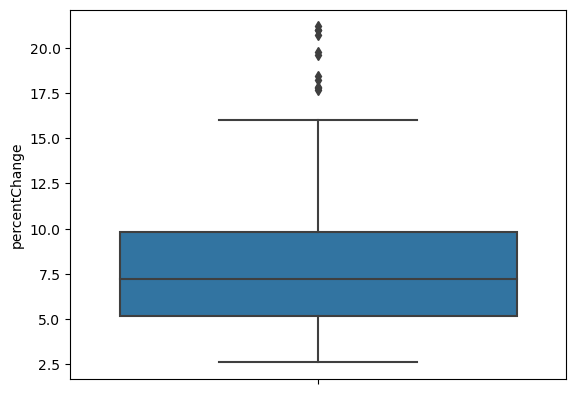

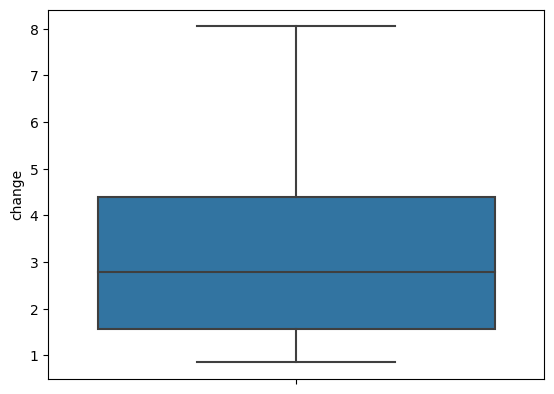

In [21]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i])
        plt.show();

In [22]:
df.dropna(inplace=True)

In [23]:
le=LabelEncoder

In [24]:
df.head(11)

,price,percentChange,change
1,30.63,4.646396,1.36
3,31.38,3.735537,1.13
17,29.23,5.905797,1.63
24,28.29,5.836139,1.56
29,28.08,3.539823,0.96
30,29.08,3.561254,1.00
31,30.38,4.470426,1.30
38,14.30,7.196402,0.96
45,17.94,19.600000,2.94
48,18.83,13.433735,2.23


# Checking the correlation with the target "Price"

<AxesSubplot:>

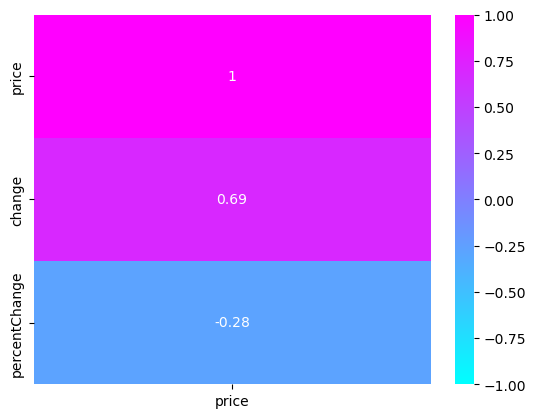

In [25]:
sns.heatmap(df.corr()[["price"]].sort_values(by="price", ascending=False), vmin=-1, vmax=1, annot=True,cmap="cool")

# Lets take only the columns with good correlation with the target

In [26]:
x=df[["change","percentChange"]].values

In [27]:
y=df[["price"]].values

# Feature scaling

In [28]:
ss=StandardScaler()

In [29]:
x=ss.fit_transform(x)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Model building

In [31]:
models={"LinearRegression":LinearRegression(),
       "Ridge":Ridge(),
       "LinearSVR":LinearSVR(),
       "DescionTreeRegressor":DecisionTreeRegressor(),
      "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor() }

In [32]:
for name, model in models.items():
    model.fit(x_train, y_train)
    print("model trained with {}".format(name))
    training_score = model.score(x_train, y_train)*100
    testing_score = model.score(x_test, y_test)*100
    score = r2_score(y_test, model.predict(x_test))*100
    mae = mean_absolute_error(y_test, model.predict(x_test))
    mse = mean_squared_error(y_test, model.predict(x_test))
    rmse = np.sqrt(mse)
    print("r2score: ",score)
    print("training_score: ", training_score)
    print("testing_score: ", testing_score)
    print("mae: ", mae)
    print("mse: ", mse)
    print("rmse_test: ", rmse)
    print("*"*100)

model trained with LinearRegression
r2score:  79.15190466190114
training_score:  84.93896799073848
testing_score:  79.15190466190114
mae:  9.04827262503888
mse:  156.6351313636498
rmse_test:  12.515395773352507
****************************************************************************************************
model trained with Ridge
r2score:  78.99556437777422
training_score:  84.92678818547395
testing_score:  78.99556437777422
mae:  9.100405247452027
mse:  157.80974134813601
rmse_test:  12.562234727473294
****************************************************************************************************
model trained with LinearSVR
r2score:  65.1503106138834
training_score:  75.34613024942556
testing_score:  65.1503106138834
mae:  9.480918226049749
mse:  261.83138490360255
rmse_test:  16.181204680233254
****************************************************************************************************
model trained with DescionTreeRegressor
r2score:  89.07012411363687
training_sco

In [33]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  11.050152337751118
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  11.009418576549809
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  11.49207330487177
****************************************************************************************************
cross validation model : DescionTreeRegressor
AVERAGE RMSE:  7.980324293876815
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  9.873575409229314
****************************************************************************************************
cross validation model : RandomForestRegressor
AVERAGE RMSE:  6.025649149618829
***************************************************

# Selecting RandomForestRegressor as it is having best metrics

In [34]:
model=RandomForestRegressor()

In [35]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [36]:
y_pred = model.predict(x)

In [37]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)

In [38]:
OUTPUT.head()

,ACTUAL,PREDICTION
0,30.63,29.4588
1,31.38,31.6030
2,29.23,28.3082
3,28.29,28.0744
4,28.08,28.4594


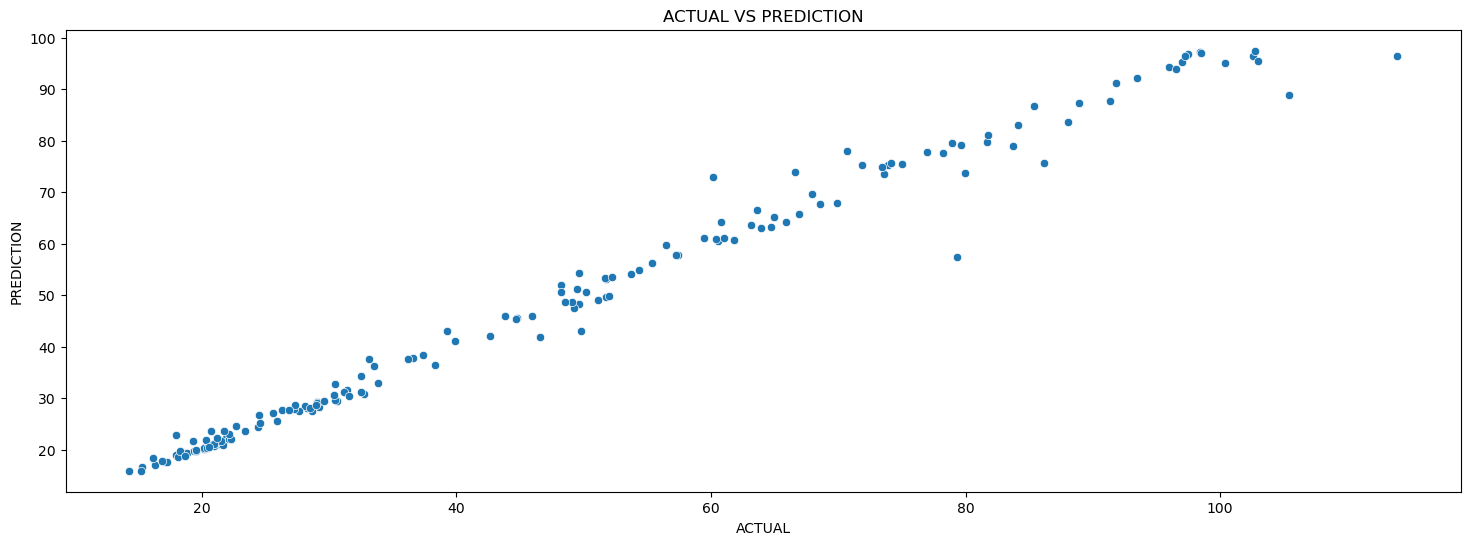

In [39]:
plt.figure(figsize=(18,6))
plt.title("ACTUAL VS PREDICTION")
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION");

In [40]:
pickle.dump(model,open('MODEL.pkl','wb'))